<a href="https://colab.research.google.com/github/Tomokki/private_Python-.gitkeep/blob/main/(%E3%82%A2%E3%83%B3%E3%82%B5%E3%83%B3%E3%83%96%E3%83%AB%E5%AD%A6%E7%BF%92%EF%BC%89%E3%83%9C%E3%82%B9%E3%83%88%E3%83%B3%E5%B8%82%E9%83%8A%E5%A4%96%E3%81%AE%E5%9C%B0%E5%9F%9F%E5%88%A5%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pythonを用いたシングル（回帰）
* ボストン市郊外の地域別住宅価格に関するデータ

###データ概要

In [ ]:
import pandas as pd

boston_df = pd.read_excel("boston_clean.xlsx")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x = boston_df.drop("MEDV", axis =1)
y = boston_df["MEDV"]

##標準化
* 説明変数を標準化
* 平均、分散（標準偏差）を用いて平均を0 、分散を1 にする操作

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# データを前処理
scaler = StandardScaler()
scaler.fit(x)
a = x
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns = a.columns

# データをトレーニングセットとテストセットに分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)


##非線形SVM の学習モデルを作成
* SVRライブラリを用いて非線形SVM の学習モデルを作成

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel= "rbf", C=18.33, epsilon = 1.44 , max_iter = 10000)
model.fit(x_train,y_train)
print("coefficient =", model.dual_coef_)
print("intercept = ", model.intercept_)

coefficient = [[-16.37920466  -0.08324938 -18.33        18.33         7.53204838
    6.52956784 -18.33        -6.05945896  -7.05736594  18.33
   18.33        -4.61539414  -5.32408733  17.97246077 -18.33
   18.33       -18.33       -18.33       -18.33       -18.33
  -14.85008876  18.33       -14.94858338  18.33        -2.09426778
   -5.78215556 -18.33        18.33       -13.56338212 -11.14197964
  -15.97050098  18.33       -18.33        16.44170537  14.31284693
    0.4698375   12.8401151   -9.37521763 -14.21601205 -18.33
  -18.33        -2.74994896  18.33         2.16473642 -18.33
  -18.33       -12.14527204  18.33        18.33        -1.86083871
  -12.90521323  11.9572459  -17.31180394  -1.38965235  10.75133161
  -18.33        18.33       -18.33         5.8872754    7.4299781
  -17.51390676   7.97339953  18.33       -10.49587977 -18.33
    0.52827162  -5.49591095  14.47397655  18.33        -0.93693451
    7.98273529  18.33        18.33        18.33       -18.33
   18.05673428   8.05240

##残差プロットの確認
* 残差のばらつきを見る残差分析を実施

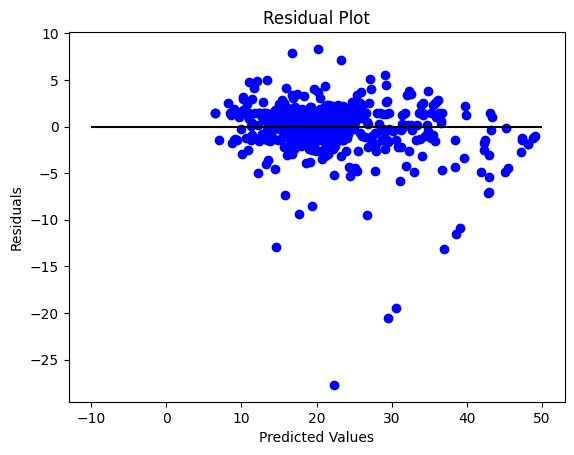

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x)
plt.scatter(y_pred,y_pred-y,color="blue")
plt.hlines(y=0,xmin=-10,xmax=50,color="black")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

* 残差がy 軸「0 」の付近で均一に分散していることが望ましい
* 大きく外れている値は外れ値である可能性がある

##平均二乗誤差（MSE: Mean Square Error Error)
* 実際の値とモデルによる予測値との誤差の平均値
* モデルの残差が平均的にどのくらいかを表す指標
* MSEは低ければ低いほど良い

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE:(train)", mean_squared_error(y_train,model.predict(x_train)))
print("MSE:(test)", mean_squared_error(y_test,model.predict(x_test)))

MSE:(train) 5.15249937200524
MSE:(test) 17.75076380914019


##決定係数𝑅^2
* 説明変数 が 目的変数 をどれくらい説明できているかを表す値
* モデルの残差が平均的にどのくらいかを表す指標
* 1に近いほど精度が良い
* 𝑅^2 が 0.6 以下 の回帰モデルは使い物にならない
* 𝑅^2 が 0.9 以上 の回帰モデルは過学習の可能性

In [ ]:
from sklearn.metrics import r2_score
print("r^2(train):", r2_score(y_train,model.predict(x_train)))
print("r^2(test):", r2_score(y_test,model.predict(x_test)))

r^2(train): 0.9392139568661362
r^2(test): 0.786817307786409


#Pythonを用いたバギング（回帰）

##ボストン市郊外の地域別住宅価格に関するデータ

###データ概要

In [ ]:
import pandas as pd

boston_df = pd.read_excel("boston_clean.xlsx")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x = boston_df.drop("MEDV", axis =1)
y = boston_df["MEDV"]

##標準化
* 説明変数を標準化
* 平均、分散（標準偏差）を用いて平均を0 、分散を1 にする操作

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# データを前処理
scaler = StandardScaler()
scaler.fit(x)
a = x
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns = a.columns

# データをトレーニングセットとテストセットに分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)


##非線形SVM の学習モデルを作成
* SVRライブラリを用いて非線形SVM の学習モデルを作成
* BaggingRegressorライブラリを用いてバギングを実行

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

model = BaggingRegressor(
    SVR(kernel = "rbf", C=18.33, epsilon=1.44,max_iter=10000),
    n_estimators=100,random_state=0)
model.fit(x_train,y_train)

BaggingRegressor(estimator=SVR(C=18.33, epsilon=1.44, max_iter=10000),
                 n_estimators=100, random_state=0)

##残差プロットの確認
* 残差のばらつきを見る残差分析を実施

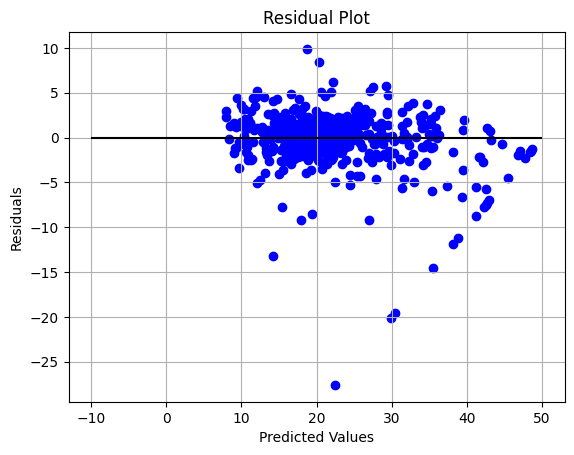

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x)

plt.scatter(y_pred,y_pred-y,color="blue")
plt.hlines(y=0,xmin=-10,xmax=50,color="black")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

* 残差がy 軸「0 」の付近で均一に分散していることが望ましい
* 大きく外れている値は外れ値である可能性がある

##平均二乗誤差（MSE: Mean Square Error Error)
* 実際の値とモデルによる予測値との誤差の平均値
* モデルの残差が平均的にどのくらいかを表す指標
* MSEは低ければ低いほど良い

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE:(train)", mean_squared_error(y_train,model.predict(x_train)))
print("MSE:(test)", mean_squared_error(y_test,model.predict(x_test)))

MSE:(train) 6.001983223022987
MSE:(test) 19.147011476955143


##決定係数𝑅^2
* 説明変数 が 目的変数 をどれくらい説明できているかを表す値
* モデルの残差が平均的にどのくらいかを表す指標
* 1に近いほど精度が良い
* 𝑅^2 が 0.6 以下 の回帰モデルは使い物にならない
* 𝑅^2 が 0.9 以上 の回帰モデルは過学習の可能性

In [ ]:
from sklearn.metrics import r2_score
print("r^2(train):", r2_score(y_train,model.predict(x_train)))
print("r^2(test):", r2_score(y_test,model.predict(x_test)))

r^2(train): 0.9291922648131413
r^2(test): 0.7700486864458179


#Pythonを用いたブースティング（回帰）

##ボストン市郊外の地域別住宅価格に関するデータ

###データ概要

In [ ]:
import pandas as pd

boston_df = pd.read_excel("boston_clean.xlsx")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x = boston_df.drop("MEDV", axis =1)
y = boston_df["MEDV"]

##標準化
* 説明変数を標準化
* 平均、分散（標準偏差）を用いて平均を0 、分散を1 にする操作

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# データを前処理
scaler = StandardScaler()
scaler.fit(x)
a = x
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns = a.columns

# データをトレーニングセットとテストセットに分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)


##非線形SVM の学習モデルを作成
* SVRライブラリを用いて非線形SVM の学習モデルを作成
* AdaBoostRegressorライブラリを用いてバギングを実行

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

model = AdaBoostRegressor(
    SVR(kernel = "rbf", C=18.33, epsilon=1.44,max_iter=10000),
    random_state=0)
model.fit(x_train,y_train)

AdaBoostRegressor(estimator=SVR(C=18.33, epsilon=1.44, max_iter=10000),
                  random_state=0)

##残差プロットの確認
* 残差のばらつきを見る残差分析を実施

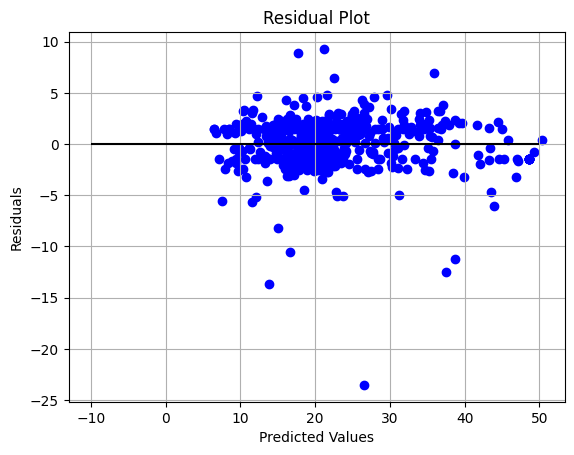

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x)

plt.scatter(y_pred,y_pred-y,color="blue")

plt.hlines(y=0,xmin=-10,xmax=50,color="black")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

* 残差がy 軸「0 」の付近で均一に分散していることが望ましい
* 大きく外れている値は外れ値である可能性がある

##平均二乗誤差（MSE: Mean Square Error Error)
* 実際の値とモデルによる予測値との誤差の平均値
* モデルの残差が平均的にどのくらいかを表す指標
* MSEは低ければ低いほど良い

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE:(train)", mean_squared_error(y_train,model.predict(x_train)))
print("MSE:(test)", mean_squared_error(y_test,model.predict(x_test)))

MSE:(train) 2.5277917374410324
MSE:(test) 15.37998221906565


##決定係数𝑅^2
* 説明変数 が 目的変数 をどれくらい説明できているかを表す値
* モデルの残差が平均的にどのくらいかを表す指標
* 1に近いほど精度が良い
* 𝑅^2 が 0.6 以下 の回帰モデルは使い物にならない
* 𝑅^2 が 0.9 以上 の回帰モデルは過学習の可能性

In [ ]:
from sklearn.metrics import r2_score
print("r^2(train):", r2_score(y_train,model.predict(x_train)))
print("r^2(test):", r2_score(y_test,model.predict(x_test)))

r^2(train): 0.9701786557373774
r^2(test): 0.8152898629652607
